# 注意

レクチャー用なので一度作ったら更新はしない。

最初は次のセルを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

init_printing()

# シンボル定義
k,x,y,z = symbols('k,x,y,z')

# 関数、特に多項式

`math_simple_symbolic_algebra.ipynb` から。

`sympy_10_polynomial.ipynb` も参考にすること。

## 時間がなさそうな場合

方程式を解くところ、グラフのところを優先する。

# TODO

- 連立不等式
    - [GitHub にイシューあり](https://github.com/sympy/sympy/issues/13252)
    - [そのものずばりのイシュー](https://github.com/sympy/sympy/issues/13389)

## 多項式計算ができる

In [39]:
from sympy import Symbol
x = Symbol('x')
display(x + x + 1)

In [5]:
display(x + x + 1)

In [6]:
display(x * x + 2 * x + 1)

### べき乗の記号
- $x^2$ は `x**2`
- $x^3$ は `x**3`
- 一般に $x^n$ は `x**n`

In [7]:
display(x**3 + 3 * x**2 + 3**x + 1)

In [8]:
display((x+1)**3)

一般の $n$ だと 2 項展開してくれない模様。やり方ある？

In [7]:
n = Symbol("n", integer=True)
p = (x+y)**n
display(p)
display(p.expand())

display(((x+y)**3).expand())

# 変数とシンボルのアルファベットは同じでなくてもいい

In [9]:
from sympy import Symbol

a = Symbol('x')
display(a + a + 1)

## 変数がどのアルファベットを表しているか調べる

In [10]:
x = Symbol('x')
display(a.name)
display(x.name)

'x'

'x'

## x, y のように 1 文字でなくてもいい

In [13]:
b = Symbol('test')
display(b.name)
display(b**2 + 2 * b + 1)

'test'

## 複数のシンボルを一気に定義できる

`x,y,z = symbols('x,y,z')` と書ける。

In [14]:
from sympy import symbols
x,y,z = symbols('x,y,z')
s = x * y + x * y
display(s)

### 簡単な計算なら処理してしまう

In [17]:
p = x * (x + x)
display(p)

### 少し複雑になると展開などを自動処理しない

もちろん  `expand()` や `factor()` など展開・因数分解してくれるメソッドはある。

In [18]:
p = (x + 2)*(x + 3)
display(p)

# factor, expand

In [19]:
from sympy import Symbol
from sympy import factor, expand
x = Symbol('x')
y = Symbol('y')

### 因数分解

In [51]:
expr = x**2 - y**2
f_tmp = factor(expr)
display(expr)
print("->")
display(f_tmp)

->


### 展開

In [22]:
e_tmp = expand(f_tmp)
display(e_tmp)

## 多項式・有理式の割り算
$f(x) = x^2 + 4/x^2$, $g(x) = (x+2/x)^2$ として $g$ を $f$ で割った結果を考えよう.
`pdiv()` を使うといいようだ.

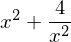

In [2]:
f = x**2 + 4/x**2
display(f)

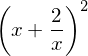

In [3]:
g = (x + 2/x)**2
display(g)

次のセルの結果は $g = f + 4$ を意味している。

In [4]:
display(pdiv(g, f))

### 3 次式

In [23]:
expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
factors = factor(expr)
display(factors)
display(expand(factors))

### 多項式の計算チェックに使おう

In [8]:
expr = (x+y)**4
display(expand(expr))

必ずしもサイクリックに書いてくれない（中高の教科書のような順番で書いてくれない）ので見づらいことがある。

In [12]:
from sympy import symbols
x,y,z = symbols('x,y,z')
expr = x**3 + y**3 + z**3 - 3 * x * y * z
display(expr)
print("→")
display(factor(expr))

→


順序指定法もあるにはあるが、うまいことやってくれる方法はあるだろうか？

- [公式の参考ページ](http://docs.sympy.org/latest/modules/polys/reference.html#orderings-of-monomials)

In [14]:
from sympy import init_printing
init_printing(order='grlex')

from sympy import symbols
x,y,z = symbols('x,y,z')
expr = x**3 + y**3 + z**3 - 3 * x * y * z
display(expr)
print("→")
display(factor(expr))

→


# prettyprint

http://docs.sympy.org/dev/tutorial/printing.html を見ると tex が入っていたりすると tex のタイプセットで出力してくれる模様。

このファイル冒頭にもある設定で TeX 出力したほうが見やすい.

In [25]:
from sympy import pprint
from sympy import Symbol
from sympy import factor, expand
x = Symbol('x')
y = Symbol('y')

expr = x*x + 2*x*y + y*y
print(expr)
pprint(expr)
display(expr)

x**2 + 2*x*y + y**2
 2            2
x  + 2⋅x⋅y + y 


In [27]:
expr = 1 + 2*x + 2*x**2
pprint(expr)
display(expr)

   2          
2⋅x  + 2⋅x + 1


## 多項式の順序反転
[公式のページ](http://docs.sympy.org/dev/tutorial/printing.html)を見るとオプションいろいろ書いてある。

In [28]:
from sympy import init_printing
init_printing(order='rev-lex')
display(expr)

# 級数の表示

降べきで並べてみる.

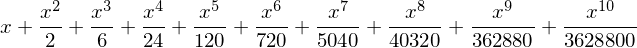

In [45]:
from sympy import init_printing
def get_some_series(n):
    """n 次の適当な級数"""
    x = Symbol('x')
    series = 0
    for i in range(1, n + 1):
        series = series + (x ** i) / factorial(i)

    return series

n = 10
series = get_some_series(int(n))

# 逆順プリントを強制
init_printing(order='rev-lex')
display(series)

# 代入

In [8]:
from sympy import Symbol, pprint
x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y
display(expr)
res = expr.subs({x:1, y:2})
display(res)

### 文字も代入できる: 辞書で指定

In [31]:
display(expr.subs({x:1-y}))

# 多項式を単純化

In [32]:
from sympy import Symbol, pprint
from sympy import simplify
x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y

expr_subs = expr.subs({x:1-y})
display(expr_subs)
display(simplify(expr_subs))

# 級数の評価

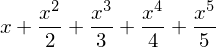

x = 3 での級数の値: 1707/20


In [9]:
from sympy import Symbol, pprint, init_printing
def get_some_series(n, x_value):
    """ある有限級数の表示"""
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i
        
    return series


# Initialize printing system with reverse order
init_printing(order='rev-lex')

# 何項目まで表示させるか
n = 5
# 評価する x の値
x_value = 3

# 級数の値の評価
series = get_some_series(n, x_value)
display(series)
series_value = series.subs({x:x_value})
print('x = {0} での級数の値: {1}'.format(x_value, series_value))

# 文字列を式に

In [33]:
from sympy import sympify, pprint
init_printing(order='lex')
expr = "x**2 + 3*x + x**3 + 2*x"
expr = sympify(expr)
display(expr)

### 式全体を 2 倍にできる

In [34]:
display(2 * expr)